<a href="https://colab.research.google.com/github/Lenakirara/imersao-dados-alura/blob/main/Desafios_Aula01_imersao_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafios propostos na aula 01 - Imersão dados - Alura

In [1]:
import pandas as pd

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head(1)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B


### Desafio01: Proporção dos inscritos por idade.


In [2]:
dados['NU_IDADE'].value_counts(normalize=True).sort_index()

13    0.000031
14    0.001107
15    0.015772
16    0.061470
17    0.166871
        ...   
73    0.000016
75    0.000016
76    0.000008
77    0.000008
82    0.000008
Name: NU_IDADE, Length: 65, dtype: float64

### Desafio02: Descobrir de quais estados são os inscritos com 13 anos.

In [8]:
dados.query('NU_IDADE == 13')[['NU_IDADE', 'SG_UF_RESIDENCIA']].sort_index()

,NU_IDADE,SG_UF_RESIDENCIA
57359,13,SP
95630,13,MT
98197,13,AP
116501,13,BA


### Desafio03: Adicionar título no gráfico

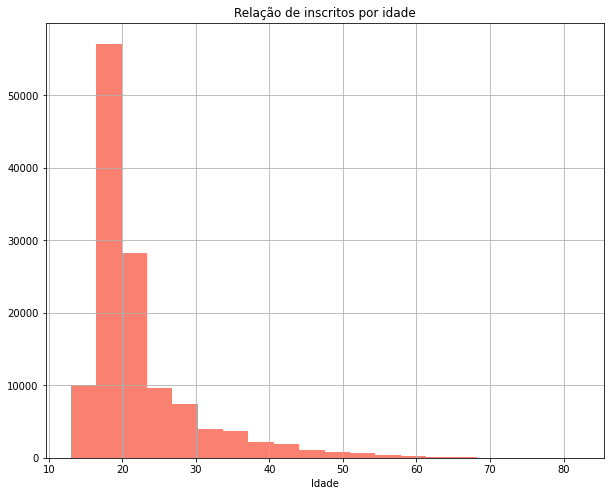

In [16]:
import matplotlib.pyplot as plt
dados["NU_IDADE"].hist(bins = 20, figsize = (10,8), color='salmon')
plt.title('Relação de inscritos por idade')
plt.xlabel('Idade');

### Desafio04: Plotar os Histogramas das idades dos treineiros e não treineiros.

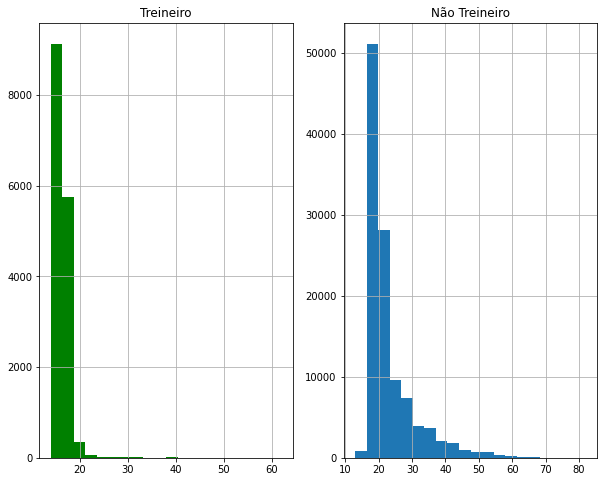

In [38]:
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

treineiro = dados.query("IN_TREINEIRO == 1")["NU_IDADE"].hist(bins = 20, figsize = (10,8), ax=axes[0], color='green')
axes[0].set_title('Treineiro')
n_treineiro = dados.query("IN_TREINEIRO == 0")["NU_IDADE"].hist(bins = 20, figsize = (10,8), ax=axes[1])
axes[1].set_title('Não Treineiro');

### Desafio05: Comparar as distribuições das provas em inglês espanhol

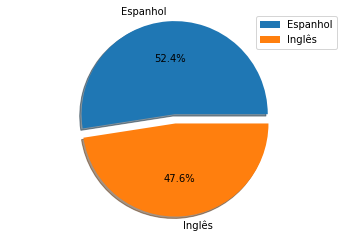

In [68]:
explode = (0.1, 0) 
plt.pie(dados["TP_LINGUA"].value_counts(), labels=['Espanhol','Inglês'], autopct='%1.1f%%',shadow=True, explode=explode)
plt.legend()
plt.axis('equal');

### Desafio06: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.

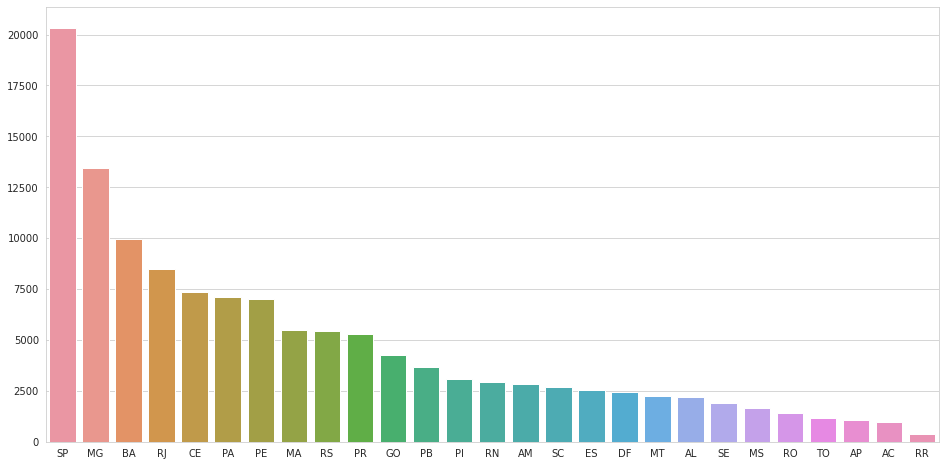

In [81]:
import seaborn as sns

prova_estado = dados['SG_UF_PROVA'].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16, 8))
plt.title('Relação de inscritos com local do prova (UF)')
sns.barplot(x=prova_estado.index,
            y=prova_estado.values);


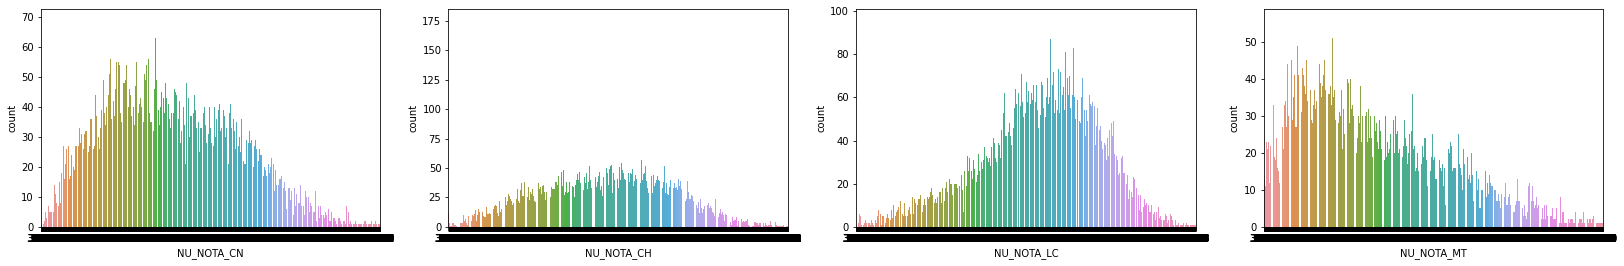

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(28, 4))

sns.countplot(ax=axes[0], x='NU_NOTA_CN', data=dados)
sns.countplot(ax=axes[1], x='NU_NOTA_CH', data=dados)
sns.countplot(ax=axes[2], x='NU_NOTA_LC', data=dados)
sns.countplot(ax=axes[3], x='NU_NOTA_MT', data=dados);

### Analisando nota por gênero (Desafio 06)

In [82]:
dados['TP_SEXO'].value_counts()

F    75883
M    51497
Name: TP_SEXO, dtype: int64

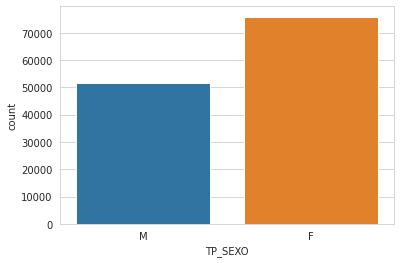

In [85]:
sns.countplot(x=dados['TP_SEXO']);

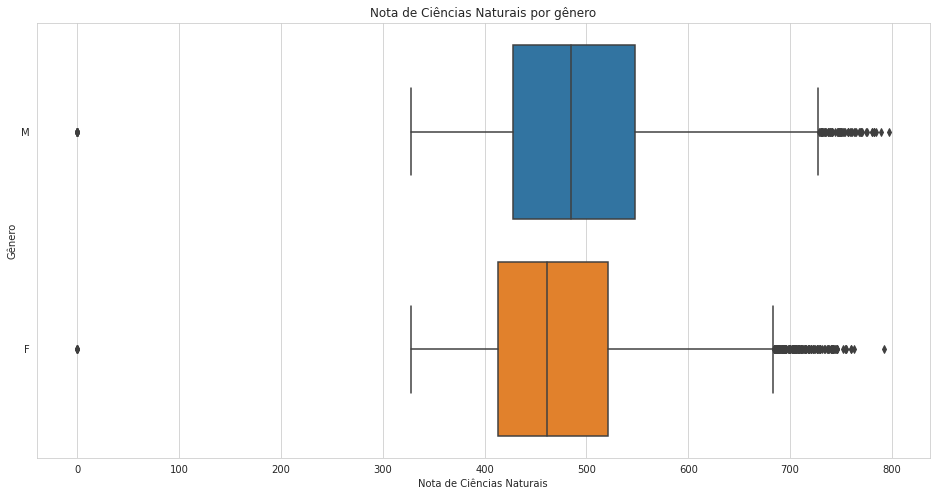

In [88]:
plt.figure(figsize=(16, 8))
sns.boxplot(x=dados['NU_NOTA_CN'], 
            y=dados['TP_SEXO'])
plt.title('Nota de Ciências Naturais por gênero')
plt.xlabel('Nota de Ciências Naturais')
plt.ylabel('Gênero');

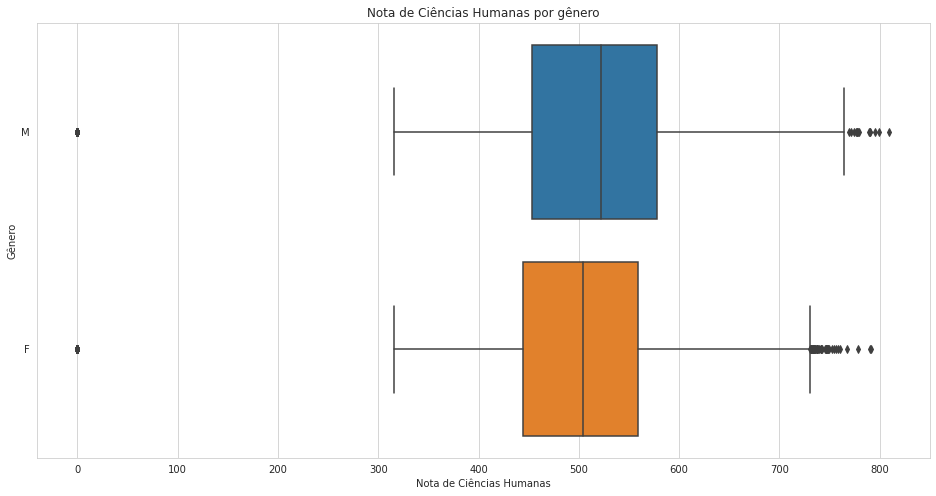

In [89]:
plt.figure(figsize=(16, 8))
sns.boxplot(x=dados['NU_NOTA_CH'], 
            y=dados['TP_SEXO'])
plt.title('Nota de Ciências Humanas por gênero')
plt.xlabel('Nota de Ciências Humanas')
plt.ylabel('Gênero');

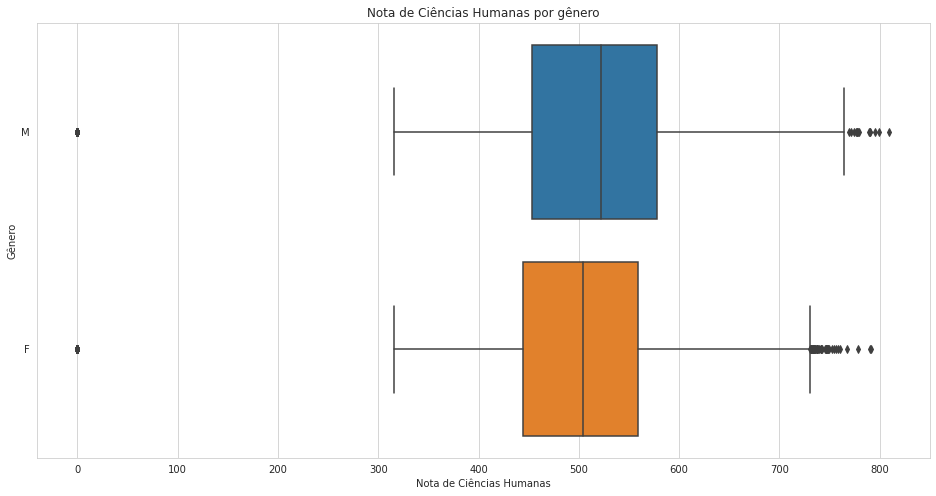

In [90]:
plt.figure(figsize=(16, 8))
sns.boxplot(x=dados['NU_NOTA_CH'], 
            y=dados['TP_SEXO'])
plt.title('Nota de Ciências Humanas por gênero')
plt.xlabel('Nota de Ciências Humanas')
plt.ylabel('Gênero');

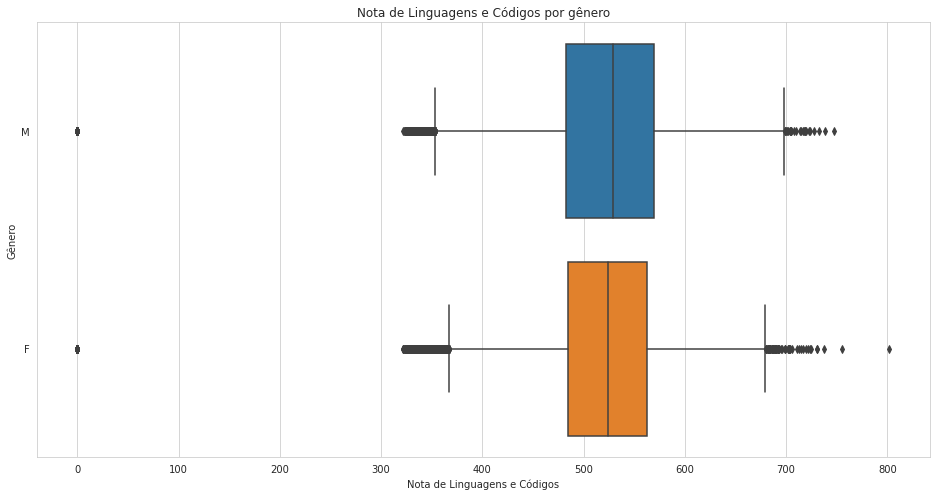

In [91]:
plt.figure(figsize=(16, 8))
sns.boxplot(x=dados['NU_NOTA_LC'], 
            y=dados['TP_SEXO'])
plt.title('Nota de Linguagens e Códigos por gênero')
plt.xlabel('Nota de Linguagens e Códigos')
plt.ylabel('Gênero');

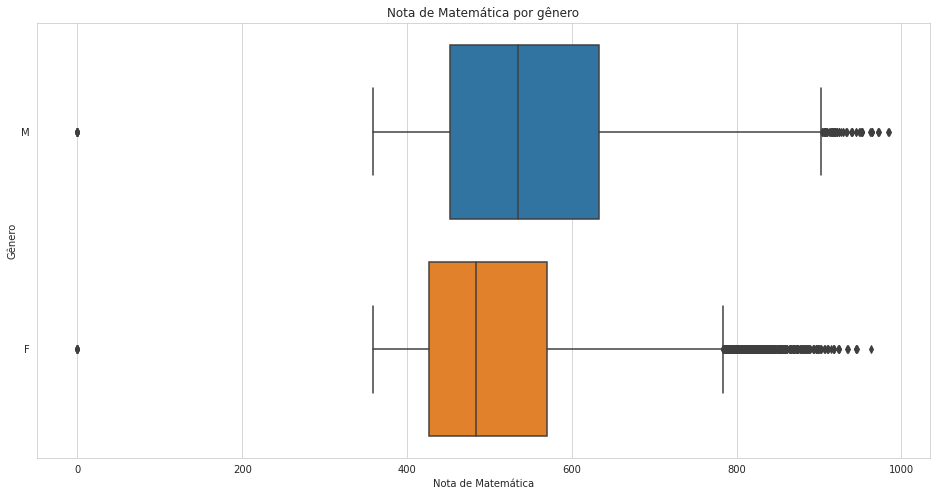

In [92]:
plt.figure(figsize=(16, 8))
sns.boxplot(x=dados['NU_NOTA_MT'], 
            y=dados['TP_SEXO'])
plt.title('Nota de Matemática por gênero')
plt.xlabel('Nota de Matemática')
plt.ylabel('Gênero');